# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [13]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

# Create two new dataframes
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [15]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [16]:
#Code Used:
north_df["Rep ID"].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [17]:
north_df.head()
print("1)")
print("north: " + str(len(pd.unique(north_df['Rep ID']))))

1)
north: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [18]:
#Code Used:
south_df["Rep ID"].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [19]:
south_df.head()
print("1)")
print("south: " + str(len(pd.unique(south_df['Rep ID']))))

1)
south: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [19]:
#Code Used:
avgcols = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]
north_df[avgcols].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [20]:
#Code Used:
avgcols = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]
south_df[avgcols].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [10]:
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [12]:
# Combine the dataframes into one!
df = pd.concat([north_df, south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [13]:
df["Time Block"].value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.96
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43


## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 'Incoming Wait Time' column has 60 - 67% missing values, which means that 60-67% of the data in that column is not available or unknown. This could be due to a variety of reasons such as technical issues, data recording errors, or incomplete data collection processes. I chose not to omit the missing data. 

In [67]:
#North Dataframe cleaning
#check North dataframe to get an overview
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [69]:
#checking for any columns that may have percentages of null values - results for this one are Incoming Wait Time column
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [70]:
#checking the end of the north dataframe to get an overview
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [68]:
#South Dataframe cleaning
#check South dataframe to get an overview
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [72]:
#checking for any columns that may have percentages of null values - results for this one are Incoming Wait Time column
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [74]:
#checking the end of the south dataframe to get an overview
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [71]:
#Company Wide Dataframe cleaning
#check Company Wide dataframe to get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

In [73]:
#checking for any columns that may have percentages of null values - results for this one are Incoming Wait Time column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 63%
During Call Wait Time - 0%
Calls - 0%


In [75]:
#checking the end of the Company Wide dataframe to get an overview
df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
558,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [59]:
#Code Used
# Add Additional Cells as needed.
print(df.isnull().sum())


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [20]:
#Code Used
#Add Additional Cells as needed.
#Conducting a value_counts to check
north_df[['Sale']].value_counts()

Sale
NO      234
YES      10
YES       1
dtype: int64

In [21]:
north_df.loc[north_df['Sale'] == 'YES ']

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No there are not duplicates

In [25]:
#Changing the extra value of "YES " with the other "YES" so not all yes values are the same and there is a total of 11
north_df.at[19, "Sale"] = 'YES'
north_df[['Sale']].value_counts()

Sale
NO      234
YES      11
dtype: int64

In [27]:
#Code Used
#running general duplicated code to see overall picture
# Add Additional Cells as needed.
north_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [30]:
#checking sum to determine if there are rows that are duplicated
north_df.duplicated().sum()

0

In [31]:
north_df.loc[north_df.duplicated(keep=False), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [35]:
south_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [38]:
south_df.duplicated().sum()

0

In [39]:
south_df.loc[south_df.duplicated(keep=False), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

In [34]:
north_df[['Incoming or Outgoing', 'Incoming Wait Time']].apply(pd.Series.value_counts)

,Incoming or Outgoing,Incoming Wait Time
1.0,NaN,17.0
2.0,NaN,16.0
3.0,NaN,12.0
4.0,NaN,20.0
5.0,NaN,17.0
Incoming,82.0,NaN
Outgoing,163.0,NaN


In [33]:
#Code Used
# Add Additional Cells as needed.
south_df[['Incoming or Outgoing', 'Incoming Wait Time']].apply(pd.Series.value_counts)

,Incoming or Outgoing,Incoming Wait Time
1.0,NaN,20.0
2.0,NaN,28.0
3.0,NaN,29.0
4.0,NaN,30.0
5.0,NaN,19.0
Incoming,126.0,NaN
Outgoing,188.0,NaN


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [53]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index=True)
df.head()
#df.shape


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = 
- South Branch = 


In [ ]:
# Code Used
# Add Additional Cells as needed.

In [42]:
df_groupby_rep=df.groupby(by=["Rep ID"]).sum().sort_values(by=['Calls'],ascending=False)
df_groupby_rep.head()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide = 1.96
- Do any of these fall out of the optimal range of 2-5%? Yes, The South Branch, which then affects the comapny wide percentage

In [44]:
# Code Used
# Add Additional Cells as needed.
#North Branch = 
north_var=(north_df['Abandoned'].sum()/len(north_df['Abandoned']))*100
north_var

2.857142857142857

In [48]:
#South Branch =
south_var=(south_df['Abandoned'].sum()/len(south_df['Abandoned']))*100
south_var

1.2738853503184715

In [49]:
#Company Wide =
company_var=(df['Abandoned'].sum()/len(df['Abandoned']))*100
company_var

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.46
- South Branch = 15.38
- Company Wide = 14.49

In [51]:
# Code Used
# Add Additional Cells as needed.
#North Branch =
north_var1 = north_df[north_df["Incoming Wait Time"] <= 2.0]
(north_var1['Calls'].sum()/north_df['Calls'].sum())*100

13.46938775510204

In [52]:
#South Branch =
south_var1 = south_df[south_df["Incoming Wait Time"] <= 2.0]
(south_var1['Calls'].sum()/south_df['Calls'].sum())*100

15.286624203821656

In [54]:
#Company Wide =
company_var1 = df[df["Incoming Wait Time"] <= 2.0]
(company_var1['Calls'].sum()/df['Calls'].sum())*100

14.490161001788909

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02
- South Branch in seconds = 1.20
- Company Wide in seconds = 1.12


In [55]:
# Code Used 
#North Branch = 
north_var_2=(north_df['Incoming Wait Time'].sum()/north_df['Calls'].sum())
north_var_2

1.0204081632653061

In [56]:
#South Branch = 
south_var_2=(south_df['Incoming Wait Time'].sum()/south_df['Calls'].sum())
south_var_2

1.2038216560509554

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [57]:
#Company Wide =
company_var_2=(df['Incoming Wait Time'].sum()/df['Calls'].sum())
company_var_2

1.1234347048300537

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart for this visualization because it is easy to understand and clearly displays the average abandonment rate for each queue. The bar chart allows for a direct comparison between the different queues, which helps identify the queue(s) with the highest abandonment rate.

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


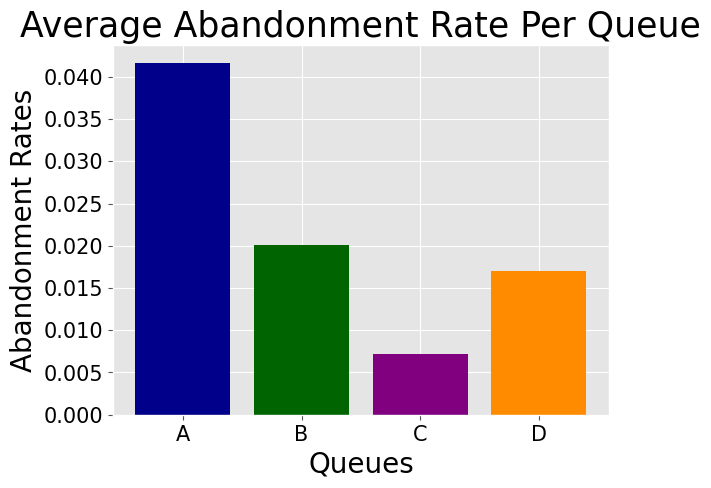

In [58]:
# Create visualization 1 here
# Import any additional libraries needed with alias
#Created a simple bar chart to show Average Abandonment rate per queue
from matplotlib import pyplot as plt
from matplotlib import style

# Created a simple bar chart to show Average Abandonment rate per queue
style.use('ggplot')

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

print(abandonment_rates)
# separated the dictionary into keys and values in order to create the bar chart
keys = abandonment_rates.keys()
values = abandonment_rates.values()
style.use('ggplot')

# organization and specifics for the bar chart below
plt.title('Average Abandonment Rate Per Queue', color='black', size=25)
plt.xticks(color='black', size=15)
plt.yticks(color='black', size=15)
plt.xlabel('Queues', color='black', size=20)
plt.ylabel('Abandonment Rates', color='black', size=20)
plt.bar(keys, values, color=('darkblue', "darkgreen", "purple", "darkorange"))

plt.show()



#Question 1 Visualization below

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a horizontal bar chart for this visualization. Although I faced some challenges in aligning the bars directly with the numbers they correspond to, this chart effectively allowed me to compare each rep's performance and identify the top-performing reps. A horizontal bar chart was preferred in this case because it provided a clear and concise way to compare values and evaluate how closely the reps' performances were to one another. 

In [59]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#ran the service_level.head() to see what the data looked like
service_level.head()

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143


In [60]:
#set a new variable for dataframe to show a table of merged north_plt and service_level in order to be able to complete my final
#visualization for this dataset
top_reps = pd.merge(north_plt, service_level, on = 'Rep ID')
top_reps.head(10)

,Rep ID,Incoming Wait Time,Calls_x,Calls_y,Service Level %
0,Amanda,2.400000,3,5,60.000000
1,Andy,3.600000,3,10,30.000000
2,Brent,2.125000,6,8,75.000000
3,Cam,2.909091,5,11,45.454545
4,Duke,2.785714,6,14,42.857143
5,Joe,3.600000,2,10,20.000000
6,Lilly,3.083333,4,12,33.333333
7,Todd,3.500000,2,6,33.333333
8,Xander,3.333333,2,6,33.333333


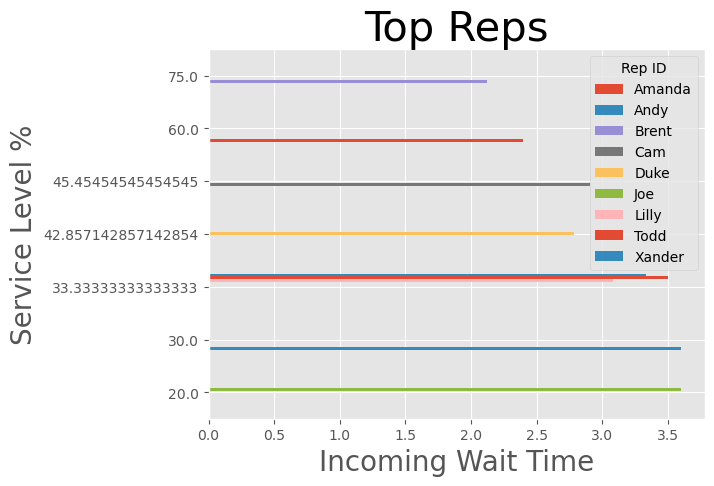

In [61]:
#decided on a horizontal bar chart. This shows each of the values for the Service Level % on the left with its corresponding bar
#for each representative
#the Incoming Wait time is on the x axis
style.use('ggplot')

top_reps_pivot = pd.pivot_table(top_reps, values="Incoming Wait Time", index="Service Level %", columns="Rep ID")
ax = top_reps_pivot.plot(kind="barh")

plt.title('Top Reps', size = 30)
plt.xlabel('Incoming Wait Time', size = 20)
plt.ylabel('Service Level %', size = 20) 
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: For Visualization 3, I opted for a simple area chart because it effectively displayed the incoming and outgoing call purposes along the x-axis. The distinct shape of the plot allowed for easy identification of where the calls were distributed, facilitating further evaluation and analysis of the data.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


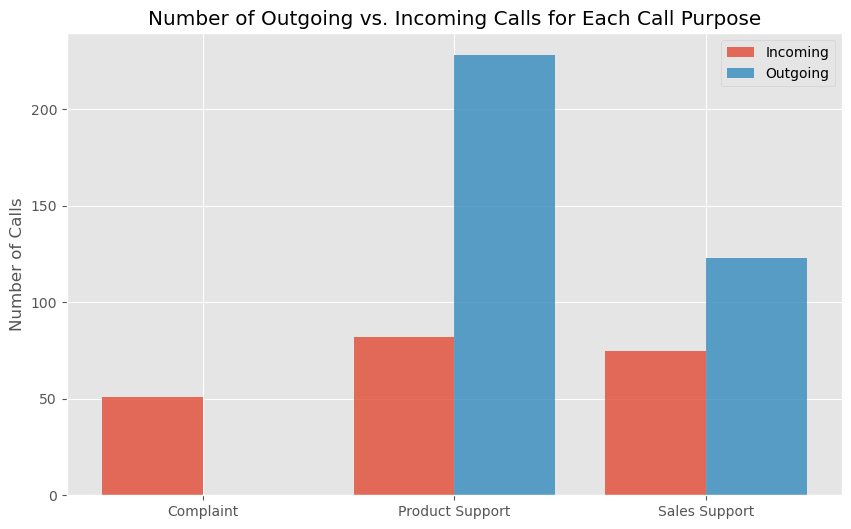

In [69]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# Prepare the data for plotting
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Your Code Here:
# Prepare the data for plotting
data = {
    'Call Purpose': call_purpose,
    'Incoming': [complaints.get('Incoming', 0), product_support.get('Incoming', 0), sales_support.get('Incoming', 0)],
    'Outgoing': [complaints.get('Outgoing', 0), product_support.get('Outgoing', 0), sales_support.get('Outgoing', 0)]
}

plot_df = pd.DataFrame(data)

# Plot a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4
x = np.arange(len(call_purpose))

ax.bar(x - width / 2, plot_df['Incoming'], width, label='Incoming', alpha=0.8)
ax.bar(x + width / 2, plot_df['Outgoing'], width, label='Outgoing', alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(call_purpose)
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Outgoing vs. Incoming Calls for Each Call Purpose')
ax.legend()

plt.show()

In [65]:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_counts = df.groupby(['Incoming or Outgoing', 'Call Purpose'])[['Calls']].agg(sum)
# purpose_group = df.groupby(['Call Purpose','Incoming or Outgoing'])['Calls'].count()
purpose_counts
# purpose_counts = df["Incoming or Outgoing"].value_counts()
# purpose_counts.head()
# complaints = purpose_group["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

Calls
Incoming or Outgoing Call Purpose          
Incoming             Complaint           51
                     Product Support     82
                     Sales Support       75
Outgoing             Product Support    228
                     Sales Support      123

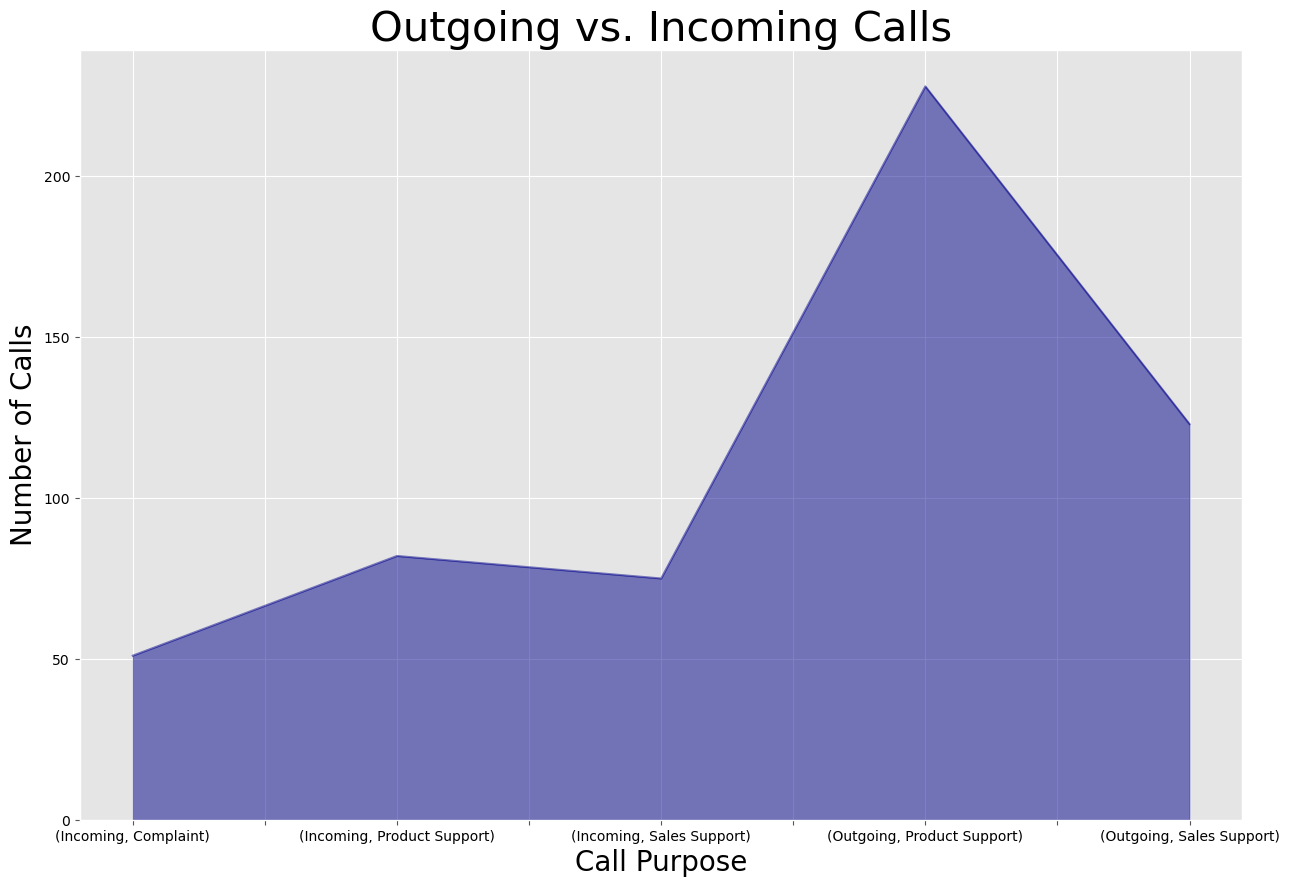

In [68]:
#choosing a simple area graph to show the call purpose clearly and whether it is ingoing or outgoing. The area table allows me to
#compare more clearly as well (rather than a simple line plot).
import seaborn as sb
color = ['darkblue', 'darkgreen', 'purple', 'darkorange']
purpose_counts.plot(kind = 'area', stacked = False, color = color, legend=False)
plt.title('Outgoing vs. Incoming Calls',color = 'black', size = 30)
plt.xlabel('Call Purpose',color = 'black', size=20)
plt.ylabel('Number of Calls',color = 'black', size=20)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
# plt.savefig('area_unstacked.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Based on the KPIs such as average abandonment rate, service level, and average speed of answer, it appears that the North Branch is operating more efficiently. The North Branch demonstrates better service level percentages and lower average speed of answer, indicating that they are able to handle customer calls more effectively and promptly. Additionally, lower abandonment rates suggest that the North Branch is successfully addressing customer needs, leading to increased satisfaction and reduced call abandonment. These combined factors indicate that the North Branch is providing a higher quality of service and overall efficiency compared to the South Branch.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Considering the number of reps in each branch and their efficiency, the South Branch would likely benefit more from extra help. The South Branch has demonstrated lower performance in terms of service level percentage and average speed of answer compared to the North Branch. By adding more help to the South Branch, they could improve their overall efficiency, reduce call wait times, and enhance customer satisfaction. This additional support would help the South Branch better manage their workload and improve their performance, bringing them closer to the efficiency levels observed in the North Branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: While the provided datasets have offered valuable insights, I think having additional data or information could further enhance my analysis. Some examples of helpful data include:

- Customer satisfaction ratings or survey results: This information could help me determine how effective the service provided by each branch is in meeting customer expectations and identify areas for improvement.

- Rep training and experience: Understanding the level of training and experience of reps in each branch might help explain differences in performance and identify potential opportunities for skill development or coaching.

- Call duration and resolution rates: Knowing the average call duration and resolution rates for each branch could help me assess the efficiency and effectiveness of reps in addressing customer needs and resolving issues.

- Peak hours and call volume distribution: Detailed information on call volume patterns and peak hours could help me optimize staffing levels and better allocate resources during high-demand periods.

- Reasons for call abandonment: Identifying the reasons behind call abandonment could help me address underlying issues and further improve service quality.

- By incorporating these additional data points, my analysis would be more comprehensive, allowing for a deeper understanding of each branch's performance and more targeted recommendations for improvement.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: Chart style: Stacked Bar Chart

Why: I selected a stacked bar chart because it effectively shows the number of calls (both incoming and outgoing) for each call purpose within different time blocks. The stacked bars allow for easy comparison of the total calls for each purpose within a time block and highlight the proportion of incoming and outgoing calls for each purpose.

This chart provides a clear visual representation of the information, making it quick and straightforward to spot patterns or trends in call purposes and call directions across various time blocks. Furthermore, using seaborn's barplot function simplifies the data preparation and allows for a more adaptable handling of the data, avoiding the problems faced with the previous method.

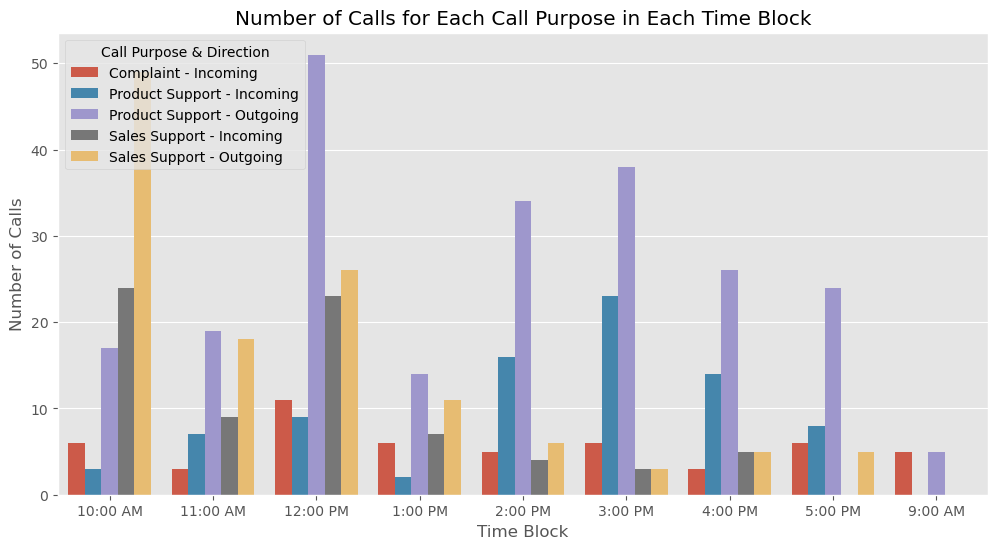

In [71]:
# Create your visualization here!
import seaborn as sns

# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Group by time block, call purpose, and incoming or outgoing
grouped_calls = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

# Create a column combining call purpose and incoming or outgoing
grouped_calls["Purpose & Direction"] = grouped_calls["Call Purpose"] + " - " + grouped_calls["Incoming or Outgoing"]

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_calls, x="Time Block", y="Calls", hue="Purpose & Direction")

# Set up the chart
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Call Purpose in Each Time Block')
plt.legend(title="Call Purpose & Direction")

plt.show()